In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ex5_implement_kmeans import KMeans

In [16]:
def generate_sample_data(n_samples=300, centers=3, random_state=None):
    """ Génère des données synthétiques pour tester l'algorithme K-means """
    if random_state:
        np.random.seed(random_state)

    centroids = np.random.randn(centers, 2) * 5

    samples_per_cluster = n_samples // centers
    
    X = []
    true_labels = []

    for i, centroid in enumerate(centroids):
        cluster_points = centroid + np.random.randn(samples_per_cluster, 2)
        X.append(cluster_points)
        true_labels.extend([i]* samples_per_cluster)

    X =np.vstack(X)
    true_labels = np.array(true_labels)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    return X[indices], true_labels[indices]

In [17]:
if __name__ == "__main__":
    X, true_labels = generate_sample_data(n_samples=300, centers=4, random_state=42)

    kmeans = KMeans(n_clusters=2, max_iters=100, random_state=42)
    kmeans.fit(X)

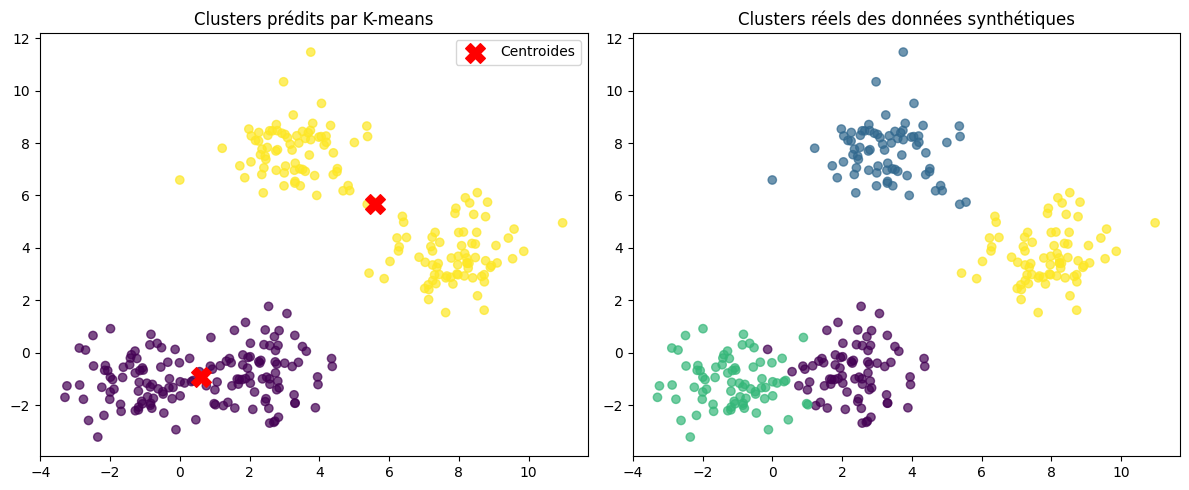

In [18]:
# Visualiser les résultats
plt.figure(figsize=(12, 5))
    
# Tracé des clusters prédits
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters prédits par K-means')
plt.legend()
    
# Tracé des clusters réels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.title('Clusters réels des données synthétiques')
    
plt.tight_layout()
plt.show()

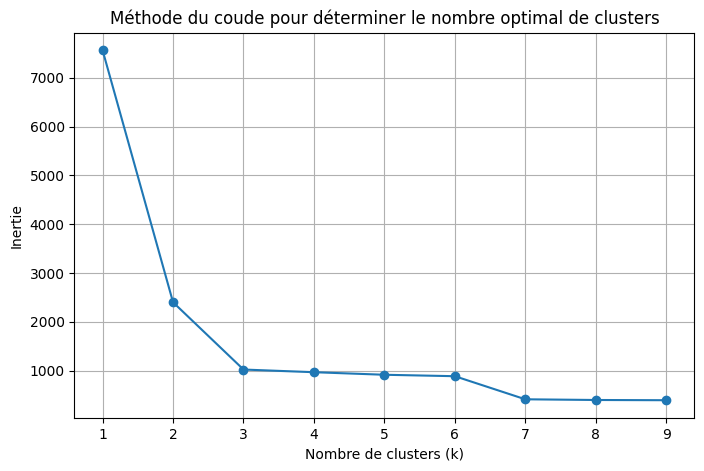

In [19]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    inertia = kmeans_model.compute_inertia(X, kmeans_model.labels, kmeans_model.centroids)
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'o-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)
plt.show()